## Titanic
### Analysis and modeling of the Titanic dataset
This Jupyter notebook analysis and models the famous Titanic dataset using Polar and logistic regression.

This is *not* an attempt to find the best predictive model.

#### Import packages

In [62]:
import os
import numpy as np
import polars as pl
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, log_loss
import matplotlib.pyplot as plt

#### List files and folders

In [63]:
os.listdir()

['README.md', '.gitignore', 'titanic.csv', 'venv', '.git', 'titanic.ipynb']

#### Load dataset

In [216]:
df = pl.read_csv("titanic.csv", separator=",")

df.head(3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


#### Have a look at the columns

In [217]:
df.describe()

statistic,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,f64,str,str,f64,f64,f64,str,f64,str,str
"""count""",891.0,891.0,891.0,"""891""","""891""",714.0,891.0,891.0,"""891""",891.0,"""204""","""889"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""",177.0,0.0,0.0,"""0""",0.0,"""687""","""2"""
"""mean""",446.0,0.383838,2.308642,null,null,29.699118,0.523008,0.381594,null,32.204208,null,null
"""std""",257.353842,0.486592,0.836071,null,null,14.526497,1.102743,0.806057,null,49.693429,null,null
"""min""",1.0,0.0,1.0,"""Abbing, Mr. Anthony""","""female""",0.42,0.0,0.0,"""110152""",0.0,"""A10""","""C"""
"""25%""",224.0,0.0,2.0,null,null,20.0,0.0,0.0,null,7.925,null,null
"""50%""",446.0,0.0,3.0,null,null,28.0,0.0,0.0,null,14.4542,null,null
"""75%""",669.0,1.0,3.0,null,null,38.0,1.0,0.0,null,31.0,null,null
"""max""",891.0,1.0,3.0,"""van Melkebeke, Mr. Philemon""","""male""",80.0,8.0,6.0,"""WE/P 5735""",512.3292,"""T""","""S"""


#### Change variables

In [218]:
df = df.select(["Survived", "Pclass", "Sex", "Age"]).drop_nulls()

nrows, ncols = df.shape

df = df.with_columns(#pl.col("Pclass").cast(pl.String).cast(pl.Categorical),
                     pl.col("Sex").cast(pl.Categorical))

# Add a column indicating when Age is missing
#df = df.with_columns(pl.col("Age").fill_null(0))
#df = df.with_columns(Age_miss = pl.lit(np.where(df['Age'] == 0, 1, 0)))

df.head(3)

Survived,Pclass,Sex,Age
i64,i64,cat,f64
0,3,"""male""",22.0
1,1,"""female""",38.0
1,3,"""female""",26.0


####

#### Divide dataset into training and test set
You should only train your model _once_, otherwise you need a third dataset.

In [219]:
random.seed(123)
train_pct = 0.7
train_nrows = np.floor(train_pct * nrows).astype(int)
train_nrows
train_rows = sorted(random.sample(range(nrows), train_nrows))
test_rows  = sorted(list(set(range(nrows)) - set(train_rows)))

print("Total rows:", nrows, "\nTraining rows:", len(train_rows), "\nTest rows:", len(test_rows))

Total rows: 714 
Training rows: 499 
Test rows: 215


#### Encode variables

In [220]:
encoder = OneHotEncoder(sparse_output=False).set_output(transform="polars")

df_enc = encoder.fit_transform(df[['Sex', 'Pclass']])

df_enc.head(3)

df = pl.concat([df, df_enc], how="horizontal")

df.head(3)

Survived,Pclass,Sex,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
i64,i64,cat,f64,f64,f64,f64,f64,f64
0,3,"""male""",22.0,0.0,1.0,0.0,0.0,1.0
1,1,"""female""",38.0,1.0,0.0,1.0,0.0,0.0
1,3,"""female""",26.0,1.0,0.0,0.0,0.0,1.0


#### Prepare data for modeling

In [246]:
x_cols = ['Pclass', 'Sex_male', 'Age']

x_train = df[train_rows, :].select(x_cols).to_numpy()
y_train = df[train_rows, :].select("Survived").to_numpy().ravel()

x_test  = df[test_rows, :].select(x_cols).to_numpy()
y_test  = df[test_rows, :].select("Survived").to_numpy().ravel()

#### Correlation

In [233]:
np.round(np.corrcoef(np.transpose(x_train)), 2)

array([[ 1.  ,  0.14, -0.36],
       [ 0.14,  1.  ,  0.11],
       [-0.36,  0.11,  1.  ]])

#### Fit a logistic regression
Setup:
* Use the training dataset
* Use the variables: Pclass, Sex, Age.
* Don't use a penalty term

In [263]:
model = LogisticRegression(penalty=None, fit_intercept=False).fit(np.full((y_train.shape[0], 1), 1), y_train)
model.coef_

array([[-0.41044278]])

In [265]:
model = LogisticRegression(penalty=None, fit_intercept=True).fit(x_train, y_train)
print("Model intercept:", model.intercept_)
print("Model coefficients:", model.coef_)

Model intercept: [4.53542655]
Model coefficients: [[-1.19478993 -2.7075785  -0.02363671]]


In [268]:
y_train.mean()
xb = model.intercept_ + np.dot(model.coef_, [0, 0, 40])


array([3.58995801])

#### Predict on training set

In [235]:
y_train_binary = model.predict(x_train)
y_train_prob   = model.predict_proba(x_train)[:, 1]

#### Predict on test set

In [222]:
y_test_binary = model.predict(x_test)
y_test_prob   = model.predict_proba(x_test)[:, 1]

#### Model evaluation

In [223]:
print("Training loss: {:.3f} and test loss: {:.3f}".format(log_loss(y_train, y_train_prob), log_loss(y_test, y_test_prob)))
print("Training precision: {:.1f} and test precision: {:.1f}".format(precision_score(y_train, y_train_binary)*100, precision_score(y_test, y_test_binary)*100))
print("Training recall: {:.1f} and test recall: {:.1f}".format(recall_score(y_train, y_train_binary)*100, recall_score(y_test, y_test_binary)*100))

Training loss: 0.448 and test loss: 0.476
Training precision: 77.0 and test precision: 75.0
Training recall: 72.4 and test recall: 65.9


#### Plot probabilities

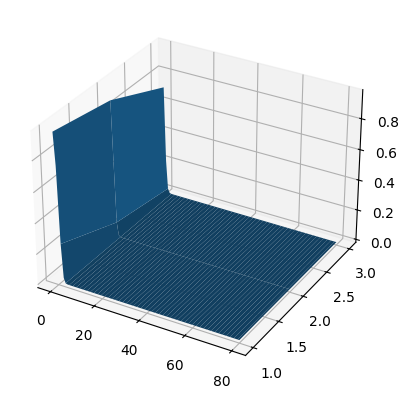

In [224]:
x_age    = np.repeat(np.linspace(0, 80, 100), 3).reshape(-1, 1)
x_pclass = np.tile([1, 2, 3], 100).reshape(-1, 1)
x_male   = np.repeat([1], 300).reshape(-1, 1)

x_plot = np.concatenate((x_pclass, x_age, x_male), axis=1)
y_plot = model.predict_proba(x_plot)[:, 1]

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot_surface(x_age.reshape(100, 3), x_pclass.reshape(100, 3), y_plot.reshape(100, 3))